In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

In [158]:
data = pd.read_csv('./data/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [159]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [160]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [161]:
data = data.drop(data.index[data['TotalSpent'] == ' '])

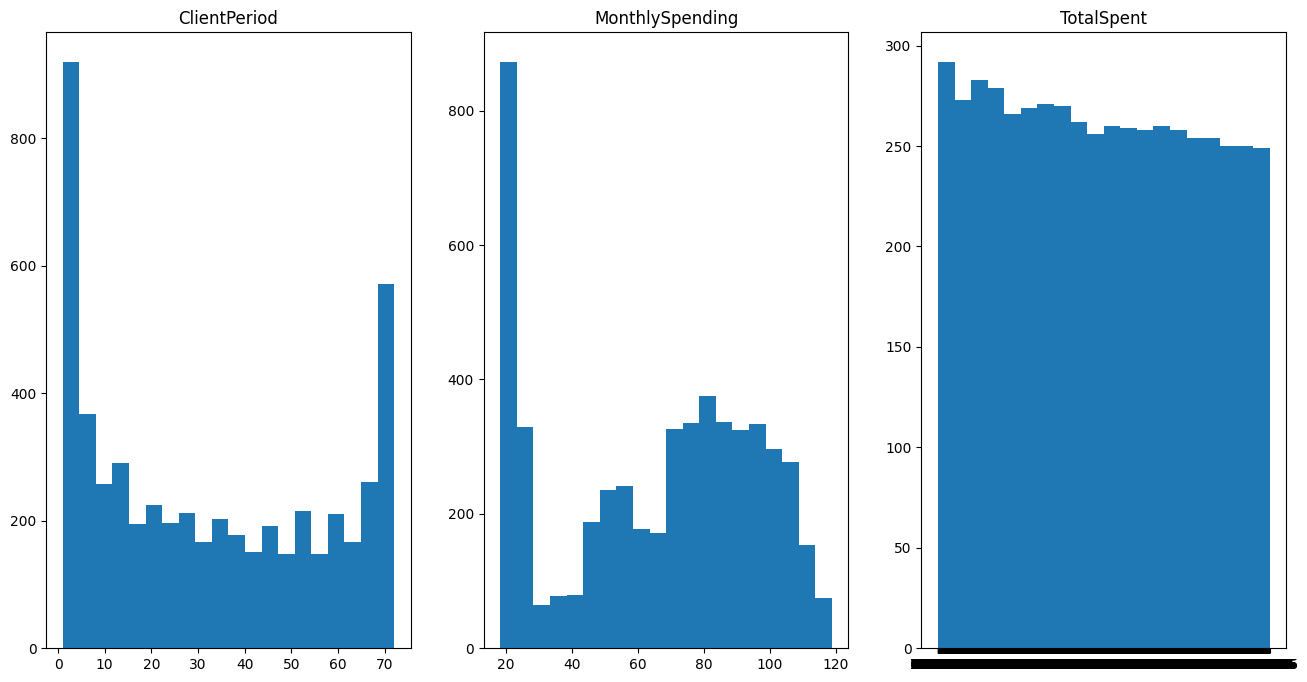

In [162]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

for i, feature in enumerate(num_cols):
  ax[i].hist(data[feature], bins=20);
  ax[i].set_title(feature);

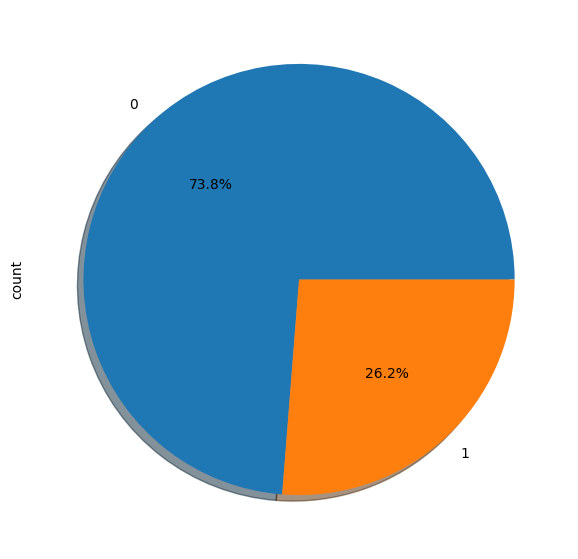

In [163]:
data[target_col].value_counts().plot(kind='pie',
                      figsize=(7,7),
                      autopct='%1.1f%%',
                      shadow=True);

In [164]:
data.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
ClientPeriod,1.000000,0.248583,0.010597,-0.352613
MonthlySpending,0.248583,1.000000,0.215202,0.184341
IsSeniorCitizen,0.010597,0.215202,1.000000,0.156502
Churn,-0.352613,0.184341,0.156502,1.000000


In [165]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [166]:
cat_feats = pd.get_dummies(data[cat_cols])
cat_feats[cat_feats.columns] = cat_feats[cat_feats.columns].apply(lambda x: 1 if x is True else 0)
X = pd.concat([data[num_cols], cat_feats], axis=1)
X = X.drop(['IsSeniorCitizen'], axis=1)
y = data[target_col]
X.head()

/tmp/ipykernel_153612/3287228471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cat_feats[cat_feats.columns] = cat_feats[cat_feats.columns].apply(lambda x: 1 if x is True else 0)


,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,72,25.85,1872.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,75.90,75.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,79.30,2570,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,115.25,6758.45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
X['TotalSpent'] = X['TotalSpent'].apply(lambda x: float(x))

In [168]:
X['TotalSpent'].unique()

array([1026.35, 1872.2 ,   75.9 , ...,   55.05, 2215.25, 1375.6 ])

In [169]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5273 entries, 0 to 5281
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5273 non-null   int64  
 1   MonthlySpending                               5273 non-null   float64
 2   TotalSpent                                    5273 non-null   float64
 3   Sex_Female                                    5273 non-null   int64  
 4   Sex_Male                                      5273 non-null   int64  
 5   HasPartner_No                                 5273 non-null   int64  
 6   HasPartner_Yes                                5273 non-null   int64  
 7   HasChild_No                                   5273 non-null   int64  
 8   HasChild_Yes                                  5273 non-null   int64  
 9   HasPhoneService_No                            5273 non-null   int64 

In [170]:
log_reg = LogisticRegressionCV(cv=5)
scaler = StandardScaler()
X = scaler.fit_transform(X)
grid_cv = GridSearchCV(log_reg, 
                       {'Cs': [100, 10, 1]}, 
                       scoring='roc_auc_ovr',
                       n_jobs=-1)
grid_cv.fit(X, y)

grid_cv.best_score_, grid_cv.best_params_

(0.8037928933401984, {'Cs': 10})

In [179]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = data.iloc[:, :-1]
y = data[target_col].apply(lambda x: 1 if x == 0 else 0)

cat_clf = CatBoostClassifier(cat_features=cat_cols)
grid_cv_cat = GridSearchCV(cat_clf, param_grid={"learning_rate": [0.1, 0.01, 0.001, 0.0001, 0.00001], "n_estimators": [100, 200, 300, 500]}, cv=5)
grid_cv_cat.fit(X, y)

In [172]:
grid_cv_cat.best_score_, grid_cv_cat.best_params_

(0.8065620475372539, {'learning_rate': 0.01, 'n_estimators': 500})

In [186]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
cat_model = CatBoostClassifier(n_estimators=500,
                               cat_features=cat_cols,
                               learning_rate=0.01)
cat_model.fit(X_train_orig, y_train)
roc_auc_score(y_test, cat_model.predict_proba(X_test_orig)[:, -1])

0:	learn: 0.6866780	total: 8.19ms	remaining: 4.09s
1:	learn: 0.6804859	total: 15.9ms	remaining: 3.97s
2:	learn: 0.6745385	total: 22ms	remaining: 3.65s
3:	learn: 0.6692757	total: 26ms	remaining: 3.23s
4:	learn: 0.6628876	total: 32.4ms	remaining: 3.21s
5:	learn: 0.6565548	total: 39.2ms	remaining: 3.23s
6:	learn: 0.6509337	total: 45.4ms	remaining: 3.2s
7:	learn: 0.6453582	total: 51.4ms	remaining: 3.16s
8:	learn: 0.6395160	total: 57.7ms	remaining: 3.15s
9:	learn: 0.6340508	total: 63.7ms	remaining: 3.12s
10:	learn: 0.6289132	total: 67.9ms	remaining: 3.02s
11:	learn: 0.6242547	total: 74ms	remaining: 3.01s
12:	learn: 0.6189028	total: 80.3ms	remaining: 3.01s
13:	learn: 0.6142028	total: 86.3ms	remaining: 3s
14:	learn: 0.6094438	total: 91.6ms	remaining: 2.96s
15:	learn: 0.6047734	total: 98.7ms	remaining: 2.98s
16:	learn: 0.6001079	total: 105ms	remaining: 2.99s
17:	learn: 0.5967678	total: 110ms	remaining: 2.96s
18:	learn: 0.5922315	total: 117ms	remaining: 2.96s
19:	learn: 0.5880776	total: 123ms	r

0.8395804401239183

# Предсказания

In [181]:
best_model = cat_model

In [182]:
X_test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')
X_test["TotalSpent"] = X_test["TotalSpent"].apply(lambda x: float(x) if x != ' ' else 2256.4831)
submission['Churn'] = best_model.predict_proba(X_test)
print(submission.iloc[:, 1:].head())
submission.iloc[:, 1:].to_csv('./data/my_submission.csv')

      Churn
0  0.041575
1  0.623390
2  0.643571
3  0.019429
4  0.009867
